In [10]:
from math import log

In [11]:
def createDataSet():
    """
        样本包括5个海洋动物，特征包括：不浮出水面是否可以生存，是否有脚蹼
        类别为：是否是鱼类
    """
    dataSet = [[1,1,'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']
              ]
    labels = ['no surfacing','flippers']
    return dataSet,labels

In [12]:
def calShannonEnt(dataSet):
    """
        计算样本的熵
    """
    #统计样本数量
    numEntries = len(dataSet)
    labelCounts = {}
    #统计出每一个类别有多少样本
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    #计算出每个类别的熵，并求和
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

In [13]:
def splitDataSet(dataSet,axis,value):
    """
        划分子集，axis是特征，value是特征值
        找到指定特征的值，将其去掉，为了方便计算子集的信息熵
    """
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [14]:
def chooseBestFeatureToSplit(dataSet):
    """
        根据信息增益计算最好的特征
    """
    #计算特征的个数和计算样本信息熵
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calShannonEnt(dataSet)
    bestInfoGain = 0
    bestFeature = -1
    #遍历所有特征，计算信息增益，找到最好的特征
    for i in range(numFeatures):
        #找到第i个特征的取值，
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        #计算条件熵
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob*calShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if(infoGain>bestInfoGain):
            bestInfoGain = infoGain
            bestFeature=i
    return bestFeature

In [15]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():classCount[vote]=0
        classCount[vote]+=1
        sortedClassCount = sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
        return sortedClassCount[0][0]

In [16]:
myDat,labels = createDataSet()

In [17]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    #当子集中所有的类别都相同的时候，结束递归，返回当前的特征
    if classList.count(classList[0])==len(classList):
        return classList[0]
    #当特征为0的时候，返回其类别中最大的特征
    if len(dataSet[0]) == 1:
        print(classList)
        return majorityCnt(classList)
    #计算信息增益，划分特征
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    #找到最好特征的取值
    featValues = [example[bestFeat] for example in dataSet]
    uniquevals = set(featValues)
    #根据取值，把数据分成不同的集合，递归构造树
    for value in uniquevals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [18]:
tree=createTree(myDat,labels)

In [19]:
tree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [56]:
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args =dict(arrowstyle="<-")
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords="axes fraction",xytext=centerPt,textcoords='axes fraction',va='center',ha="center",bbox=nodeType,arrowprops=arrow_args)
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

In [59]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

In [60]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth> maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [61]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [63]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [67]:
def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

In [68]:
myTree = retrieveTree(0)
myTree['no surfacing'][3]='maybe'
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

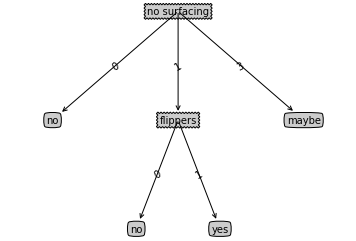

In [69]:
createPlot(myTree)